##**Digirise Infolabs ML & Data Science Internship - Task 3**
##**Name: Sachet Utekar**
##Task 3: Credit Card Detection

##**Importing necessary libraries & ignoring warnings(if any)**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##**Reading & analyzing the dataset**

In [2]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5960,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
5961,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
5962,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
5963,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0
5964,3624,-0.663445,1.162921,1.508050,0.549405,0.231377,-0.106041,0.817977,-0.387026,1.488054,...,-0.420337,-0.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5965 entries, 0 to 5964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5965 non-null   int64  
 1   V1      5965 non-null   float64
 2   V2      5965 non-null   float64
 3   V3      5965 non-null   float64
 4   V4      5965 non-null   float64
 5   V5      5965 non-null   float64
 6   V6      5965 non-null   float64
 7   V7      5965 non-null   float64
 8   V8      5965 non-null   float64
 9   V9      5965 non-null   float64
 10  V10     5965 non-null   float64
 11  V11     5965 non-null   float64
 12  V12     5965 non-null   float64
 13  V13     5965 non-null   object 
 14  V14     5965 non-null   float64
 15  V15     5965 non-null   float64
 16  V16     5965 non-null   float64
 17  V17     5965 non-null   float64
 18  V18     5965 non-null   float64
 19  V19     5965 non-null   float64
 20  V20     5964 non-null   float64
 21  V21     5964 non-null   float64
 22  

In [ ]:
credit_card_data.isnull().sum()

In [7]:
credit_card_data['Class'].value_counts()

0.0    5947
1.0      15
Name: Class, dtype: int64

In [8]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(5947, 31)
(15, 31)


In [10]:
legit.Amount.describe()

count    5947.000000
mean       61.088049
std       191.381152
min         0.000000
25%         4.900000
50%        15.950000
75%        48.000000
max      7712.430000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     15.000000
mean      49.936667
std      140.317804
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      529.000000
Name: Amount, dtype: float64

In [12]:
credit_card_data.groupby('Class').mean()

<ipython-input-12-8375fd516b82>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credit_card_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,5300.860098,-0.217987,0.267884,0.892656,0.137343,-0.058090,0.051930,0.028280,-0.067412,0.509634,...,0.026598,-0.011503,-0.088007,-0.048418,0.022312,0.090905,0.144837,0.015956,0.004043,61.088049
1.0,10753.133333,-2.985183,4.688895,-8.357376,7.001339,-2.044481,-2.260562,-6.045842,1.922919,-3.333243,...,0.895106,1.302138,0.052497,0.192898,-0.632778,-0.045086,0.360811,0.629036,0.497845,49.936667


In [13]:
legit_sample = legit.sample(n=492)

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1594,1241,-0.154248,-0.155828,0.306665,-2.368229,-0.469584,-1.546518,0.286107,-0.399132,-2.348430,...,-0.024445,0.439900,0.135085,0.366024,-0.725045,-0.431033,0.336499,0.281147,15.00,0.0
3970,14832,-0.387391,1.186199,1.403407,0.218442,0.278908,-0.460588,0.555124,-0.016764,0.883889,...,-0.384368,-0.760857,0.035235,-0.038538,-0.254887,0.062834,0.234124,0.088750,6.99,0.0
5281,2834,1.250249,0.019063,-1.326108,-0.039059,2.232341,3.300602,-0.326435,0.757703,-0.156352,...,-0.009900,-0.189322,-0.157734,1.005326,0.838403,-0.315582,0.011439,0.018031,30.00,0.0
3967,14830,-2.229060,-1.444154,2.116831,-2.161187,0.240141,-0.011293,-0.333354,0.296553,2.609922,...,0.071645,0.639999,-0.320172,-0.270709,0.315764,-0.011392,0.124194,-0.006802,205.00,0.0
3259,13306,-1.246764,1.721633,1.164017,-0.015505,-0.303413,-0.613297,0.143986,0.431349,0.794957,...,-0.343073,-0.695853,0.057199,0.249283,-0.107034,0.026342,0.325861,0.161107,1.98,0.0


In [16]:
new_dataset['Class'].value_counts()

0.0    492
1.0     15
Name: Class, dtype: int64

In [17]:
new_dataset.groupby('Class').mean()

<ipython-input-17-586b59598b15>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_dataset.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,5254.485772,-0.294198,0.282438,0.864330,0.101625,-0.080569,0.044717,0.106926,-0.020748,0.490392,...,0.067806,-0.013185,-0.123534,-0.023968,0.028797,0.114768,0.129596,0.052891,0.031369,73.315955
1.0,10753.133333,-2.985183,4.688895,-8.357376,7.001339,-2.044481,-2.260562,-6.045842,1.922919,-3.333243,...,0.895106,1.302138,0.052497,0.192898,-0.632778,-0.045086,0.360811,0.629036,0.497845,49.936667


In [18]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

In [20]:
print(Y)

1594    0.0
3970    0.0
5281    0.0
3967    0.0
3259    0.0
       ... 
3048    1.0
3192    1.0
3265    1.0
3500    1.0
3522    1.0
Name: Class, Length: 507, dtype: float64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(507, 30) (405, 30) (102, 30)


In [23]:
model = LogisticRegression() #classification algorithm

In [24]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [27]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy score on Test Data : ', test_data_accuracy) #99% acc

Accuracy score on Test Data :  0.9901960784313726


In [29]:
y_scores = model.predict_proba(X_test)[:, 1]

##**Data Visualization**

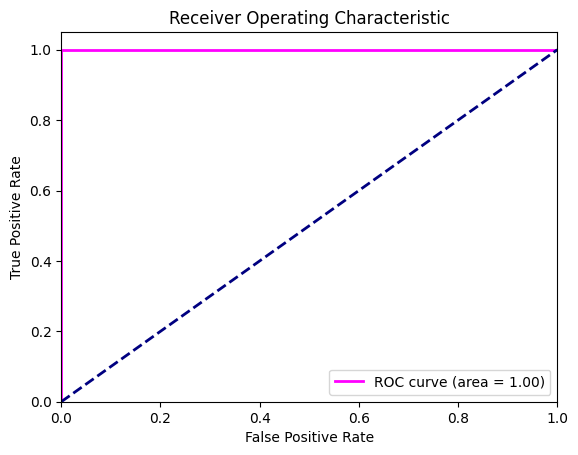

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
roc_auc = roc_auc_score(Y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='magenta', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()